# Submit to kaggle

In [1]:
import numpy as np

In [3]:
test_results = np.loadtxt('/data/dogscats/ensamble_results/combined_result.csv', delimiter=',')

In [11]:
test_results

array([[  1.00000000e+00,   9.99370000e-01,   9.99810000e-01, ...,
          9.99950000e-01,   9.97210000e-01,   9.99960000e-01],
       [  2.00000000e+00,   9.99900000e-01,   1.00000000e+00, ...,
          9.99990000e-01,   9.99790000e-01,   1.00000000e+00],
       [  3.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          9.99900000e-01,   9.99250000e-01,   9.99930000e-01],
       ..., 
       [  1.24980000e+04,   9.99950000e-01,   9.99960000e-01, ...,
          9.99720000e-01,   9.99640000e-01,   9.99990000e-01],
       [  1.24990000e+04,   9.99990000e-01,   9.99990000e-01, ...,
          1.00000000e+00,   9.99960000e-01,   1.00000000e+00],
       [  1.25000000e+04,   1.80000000e-04,   4.50000000e-04, ...,
          1.50000000e-04,   2.54000000e-03,   1.59000000e-03]])

In [26]:
def avg(x): return [x[0], np.average(x[1:])]
data = np.apply_along_axis(avg, 1, test_results)
np.savetxt('/data/dogscats/ensamble_results/ensamble_average.csv', data ,fmt='%d,%.5f', header='id,label')

In [30]:
def binnary_answer(x): return [x[0], 0.05 if np.median(x[1:]) < 0.5 else 0.95]
data = np.apply_along_axis(binnary_answer, 1, test_results)
np.savetxt('/data/dogscats/ensamble_results/ensamble_binnary_answer.csv', data ,fmt='%d,%.5f', header='id,label')

In [32]:
def stats(x): return [x[0], np.min(x[1:]), np.median(x[1:]), np.mean(x[1:]), np.max(x[1:]), np.var(x[1:])]
data = np.apply_along_axis(stats, 1, test_results)
np.savetxt('/data/dogscats/ensamble_results/ensamble_stats.csv', data ,fmt='%d,%.5f,%.5f,%.5f,%.5f,%.5f', header='id,min,median,mean,max,variance')

In [40]:
def median_of_best(x): return [x[0], np.median(x[[3,4,5,8,9]])]
data = np.apply_along_axis(median_of_best, 1, test_results)
np.savetxt('/data/dogscats/ensamble_results/ensamble_median_of_best.csv', data ,fmt='%d,%.5f', header='id,label')

# Generate stats file

In [7]:
validation_results = np.loadtxt('/data/dogscats/ensamble_results/combined_validation_result_reformatted.csv', delimiter=',')

In [8]:
validation_results

array([[  4.00000000e+00,   0.00000000e+00,   6.80000000e-04, ...,
          1.20000000e-04,   1.60000000e-04,   2.41000000e-03],
       [  1.00000000e+01,   0.00000000e+00,   6.00000000e-05, ...,
          0.00000000e+00,   5.00000000e-05,   4.00000000e-05],
       [  1.30000000e+01,   0.00000000e+00,   2.23000000e-03, ...,
          3.54000000e-03,   1.67000000e-03,   3.44000000e-03],
       ..., 
       [  1.24770000e+04,   1.00000000e+00,   9.93400000e-01, ...,
          9.95870000e-01,   9.94560000e-01,   9.99000000e-01],
       [  1.24880000e+04,   1.00000000e+00,   9.99980000e-01, ...,
          9.99990000e-01,   9.99910000e-01,   1.00000000e+00],
       [  1.24910000e+04,   1.00000000e+00,   9.78360000e-01, ...,
          9.87140000e-01,   9.97590000e-01,   9.97980000e-01]])

In [4]:
def stats(x): return [x[0],x[1],np.min(x[2:]), np.median(x[2:]), np.mean(x[2:]), np.max(x[2:]), np.var(x[2:])]
data = np.apply_along_axis(stats, 1, validation_results)
np.savetxt('/data/dogscats/ensamble_results/ensamble_validation_stats.csv', data ,fmt='%d,%d,%.5f,%.5f,%.5f,%.5f,%.5f', header='id,label,min,median,mean,max,variance')

# Confusion matirx

In [28]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import itertools
%matplotlib inline

In [29]:
valid_labels = validation_results[:,1]

In [48]:
preds = np.apply_along_axis(lambda x: np.round(np.median(x[2:])), 1, validation_results)

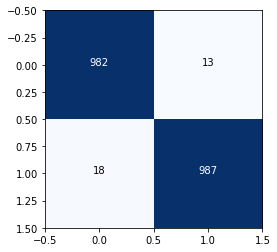

In [49]:
cm = confusion_matrix(preds,valid_labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

In [35]:
# Accuracy
(1-(13+18)/2000)*100

98.45

In [45]:
# Logloss
from sklearn.metrics import log_loss
predicted_value = np.apply_along_axis(lambda x: np.median(x[2:]), 1, validation_results)
log_loss(valid_labels, predicted_value)

0.039974324979416664

# Define plotters

In [51]:
import math
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None, sub_titles=None, grayscale=False, cmap=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3 and not grayscale):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, math.ceil(len(ims)/rows), i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=14)
        if sub_titles is not None:
            sp.set_title(titles[i] + " (" + sub_titles[i] + ")", fontsize=14)
        plt.imshow(ims[i], interpolation=None if interp else 'none', cmap=cmap)

In [72]:
from keras.preprocessing import image
def plots_for(data):
    nof_images = data.shape[0]
    rows = math.ceil(nof_images/4)
    figsize = (12, rows*4)
    titles = data[:,2]
    filenames = [['cats/cat.','dogs/dog.'][int(l[1])] + str(int(l[0])) + '.jpg' for l in data]
    plots([image.load_img('/data/dogscats/valid2/' + fn) for fn in filenames], titles=titles, rows=rows, figsize=figsize)

# Wrong answers

In [135]:
wrong_answer_idx = np.where(valid_labels != preds)
wrong_answer_raw = validation_results[wrong_answer_idx]
wrong_answer_with_median_result = np.apply_along_axis((lambda x: [x[0],x[1],np.median(x[2:])]), 1, wrong_answer_raw)

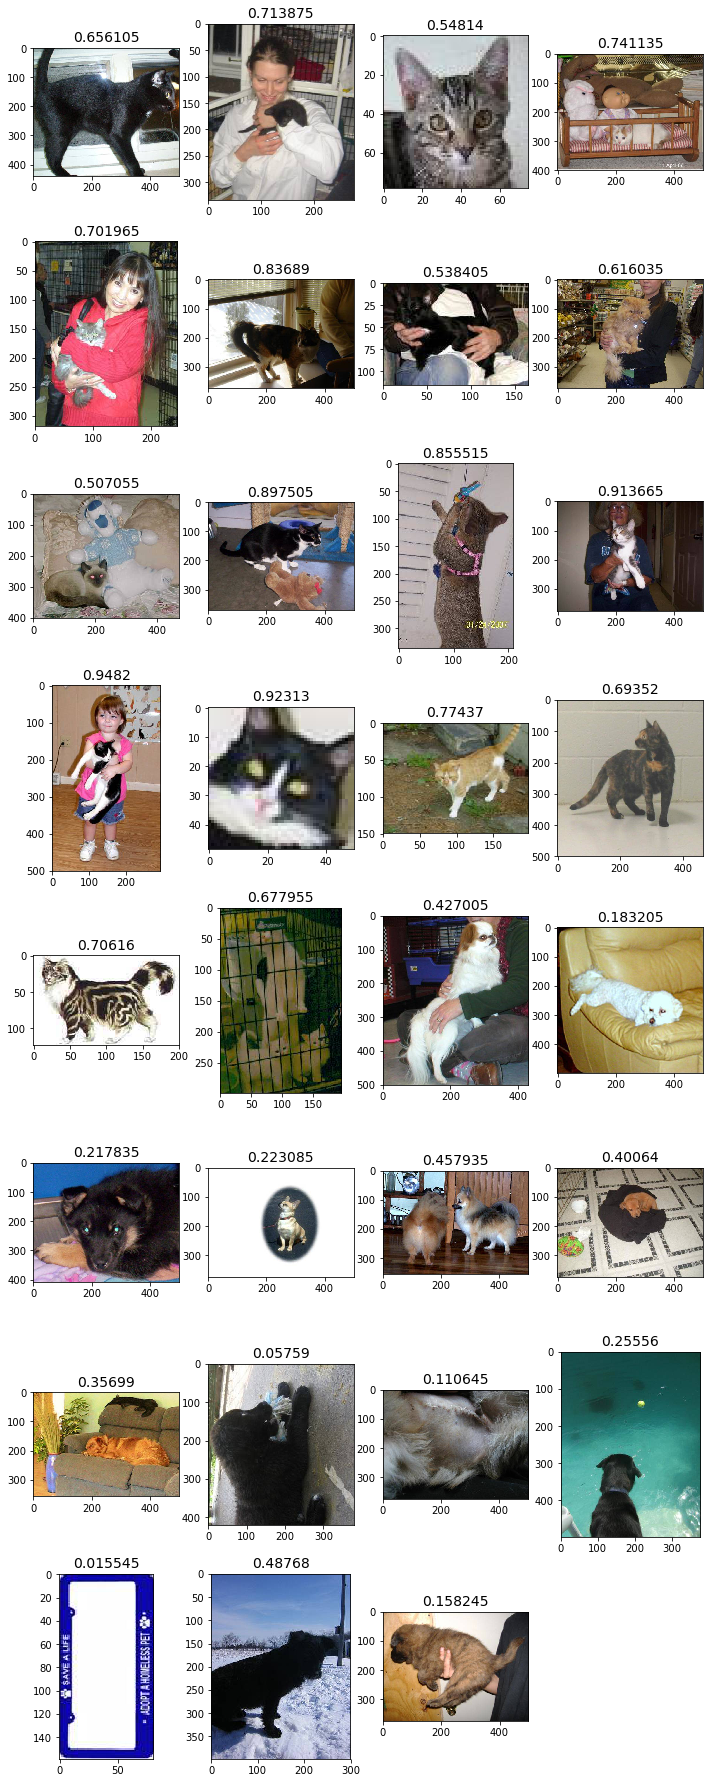

In [136]:
plots_for(wrong_answer_with_median_result)